<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"></ul></div>

In [1]:
from apps.lib import Sensor, Performance, Model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm

WHO = 2
SONG = 1
TRAIN_ORDER = 3

In [2]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
sensor_data = Sensor(verbose=1)

12:33:24 INFO << load arm CSV.
12:33:24 INFO << load drummer CSV.


In [4]:
def gogo(who_id, song_id, train_pf_order):
    train_pf = Performance(sensor_data, who_id, song_id, train_pf_order, 1, 2)
    
    pfs = []
    for pf_order in tqdm(range(1, 3 + 1)):
        if pf_order == train_pf_order:
            pfs.append(train_pf)
        else:
            pfs.append(Performance(sensor_data, who_id, song_id, pf_order, 1, 2)) 
            
    return pfs

In [5]:
pfs = gogo(WHO, SONG, TRAIN_ORDER)

100%|██████████| 3/3 [00:45<00:00, 15.16s/it]


12:34:32 DEBUG << findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/usr/bin/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
12:34:32 DEBUG << findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/usr/bin/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


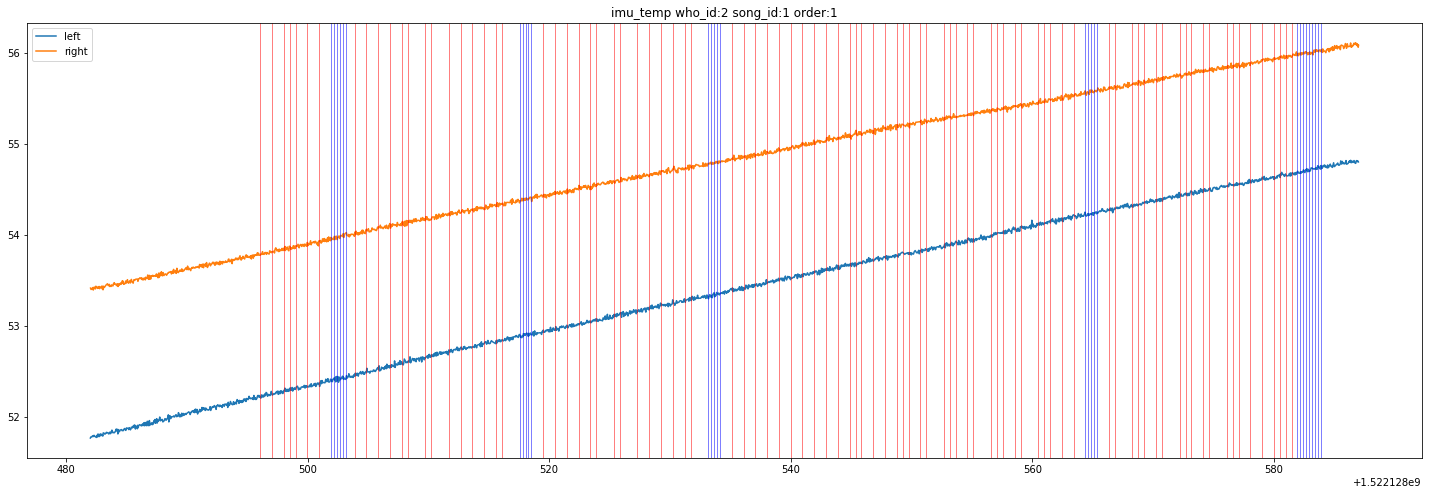

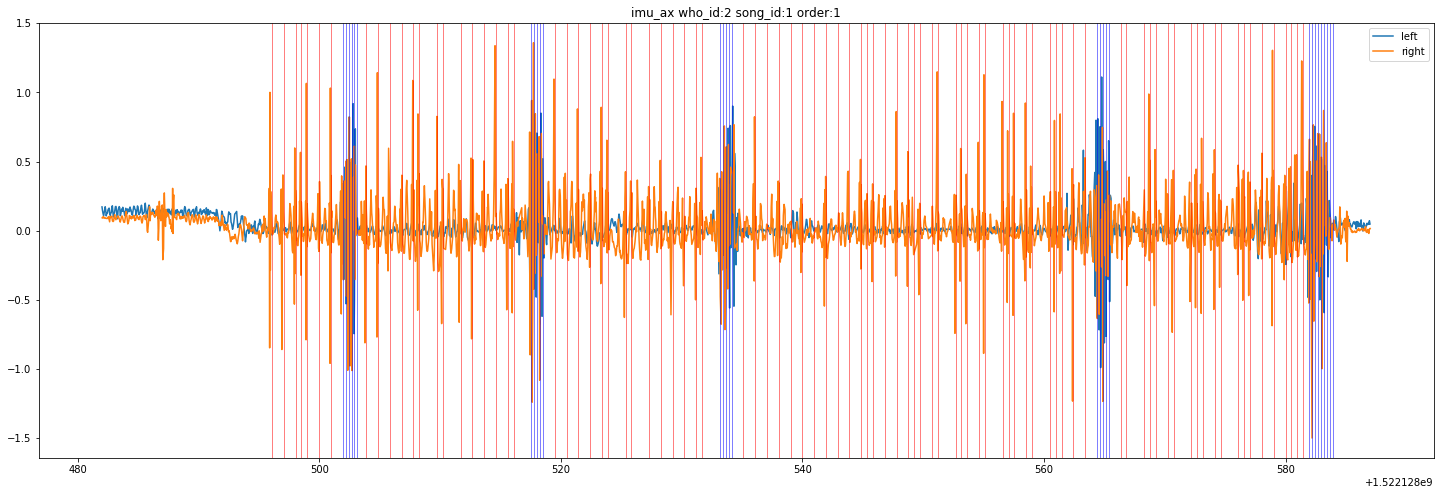

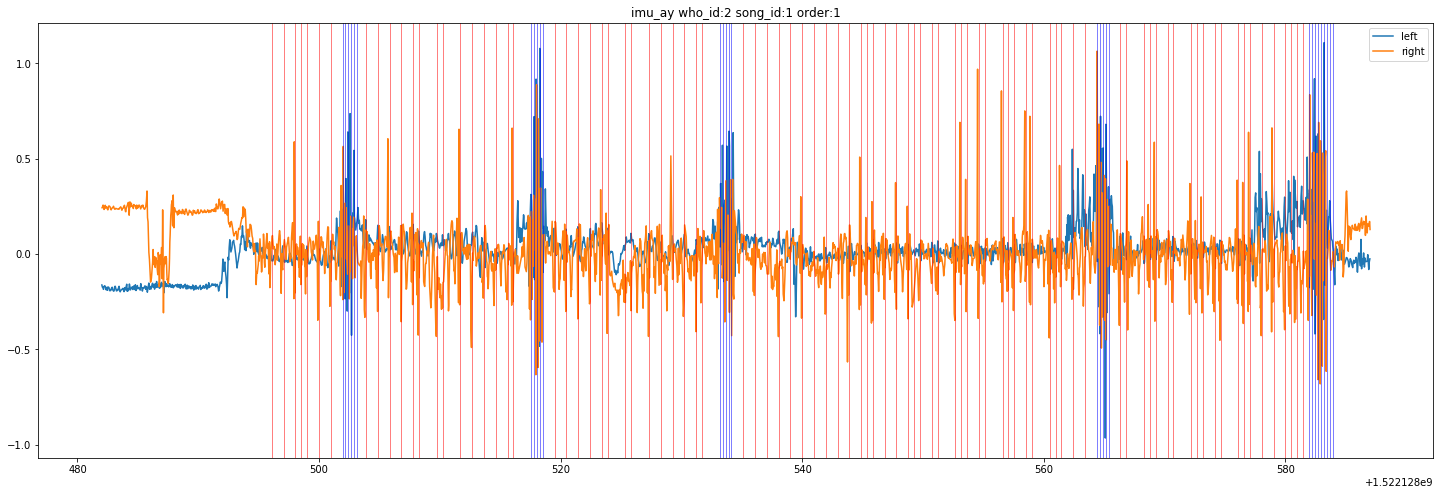

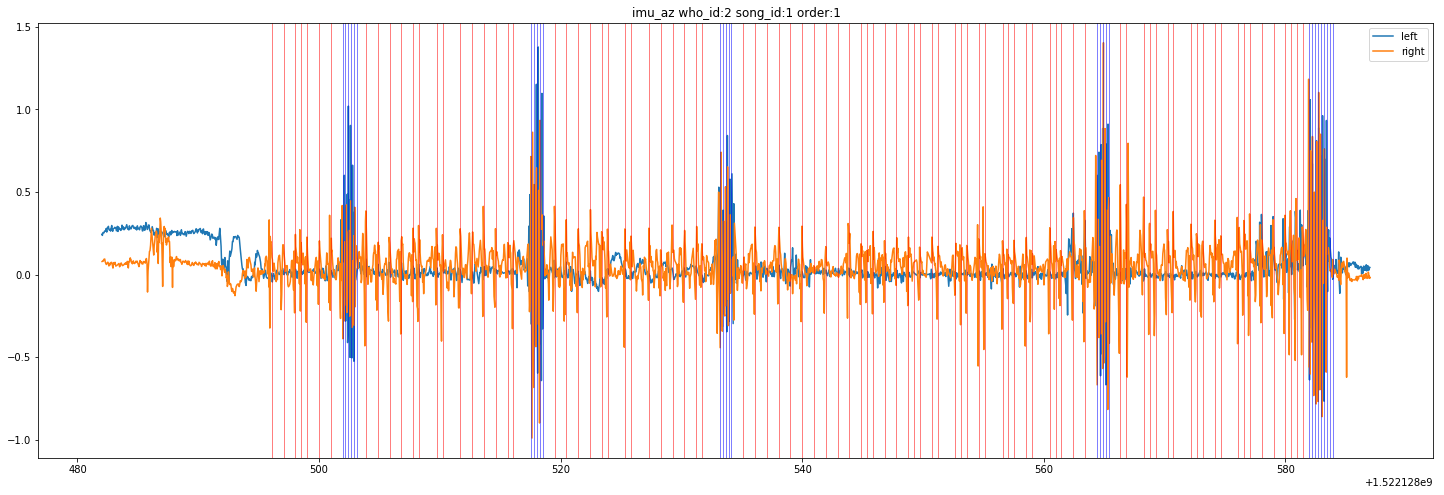

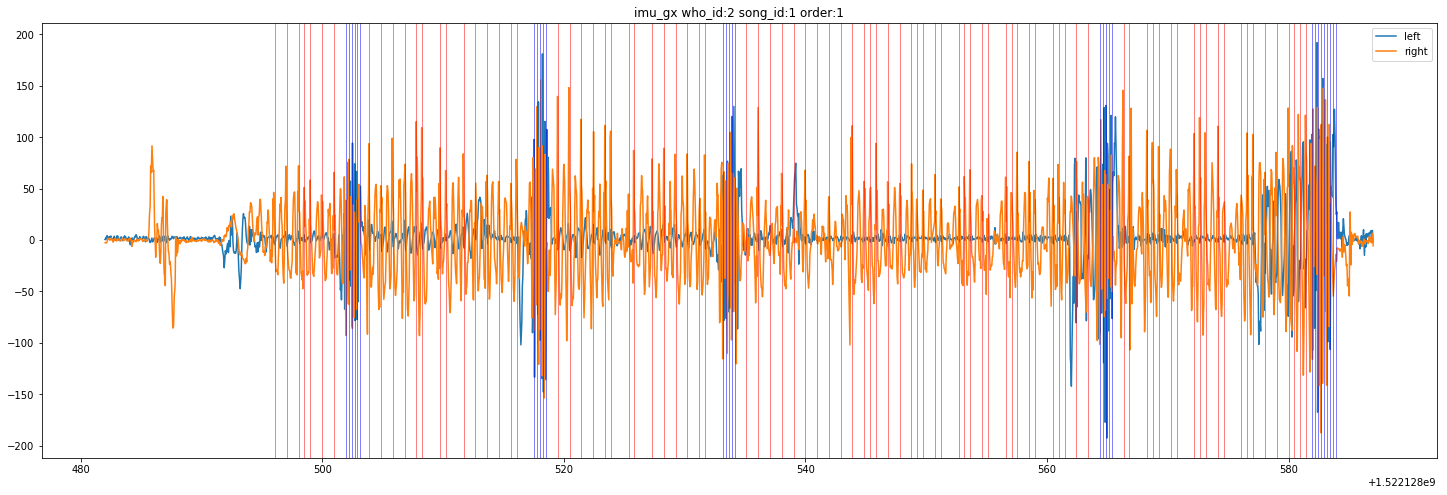

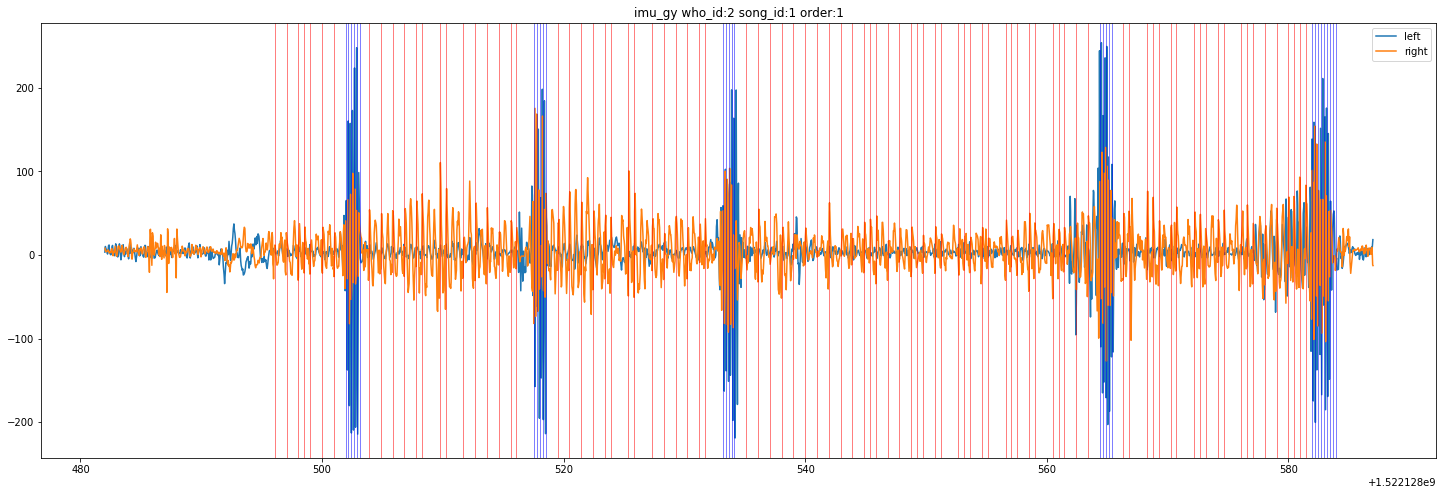

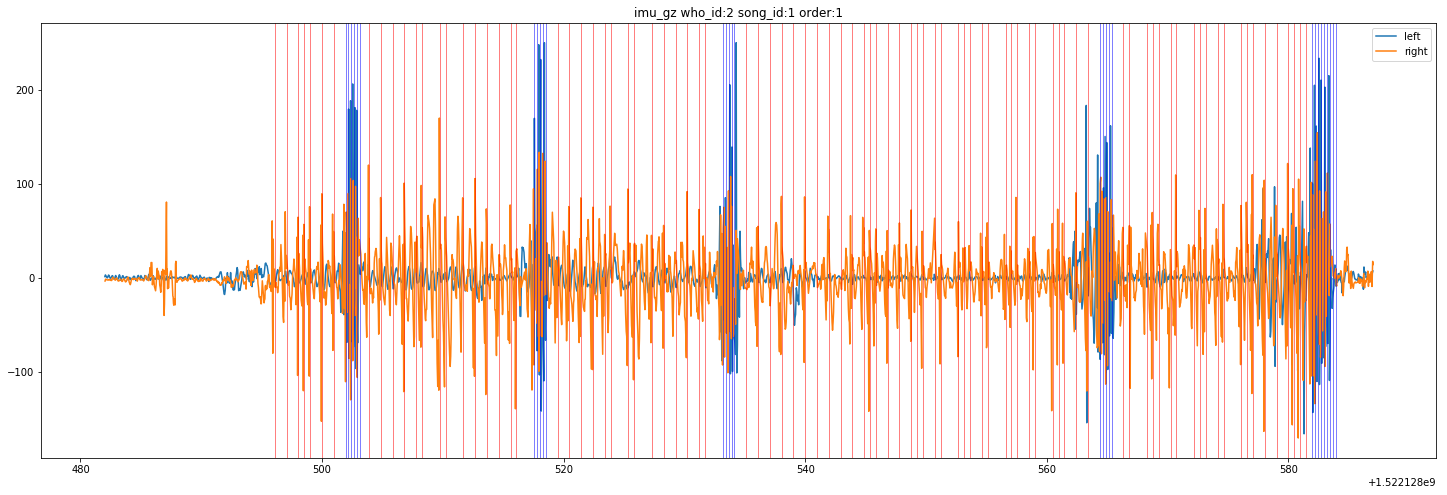

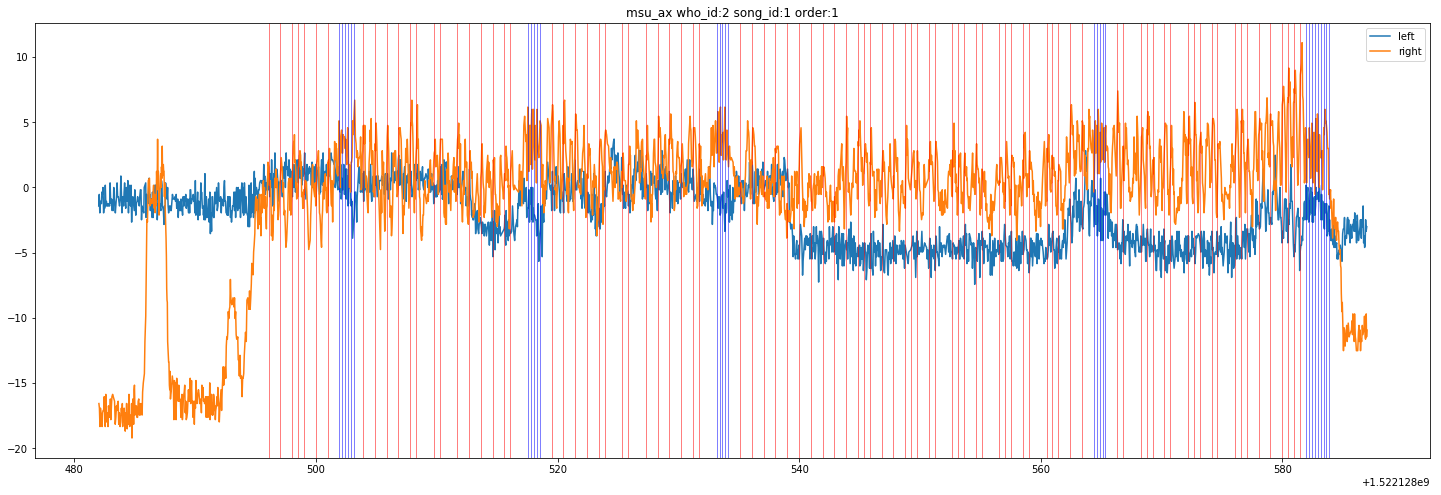

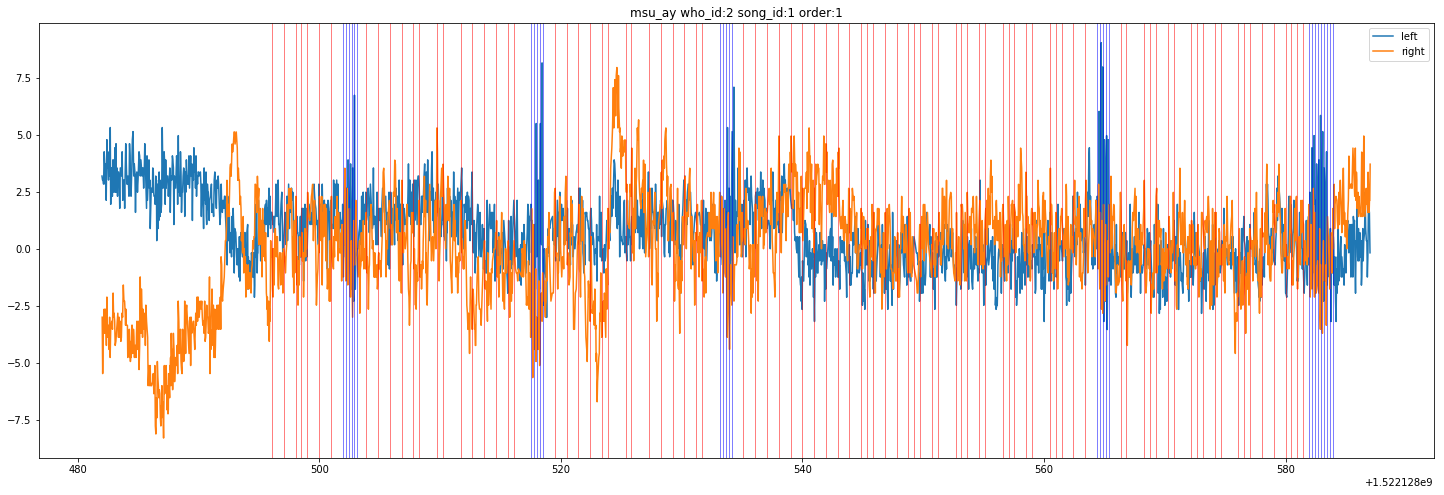

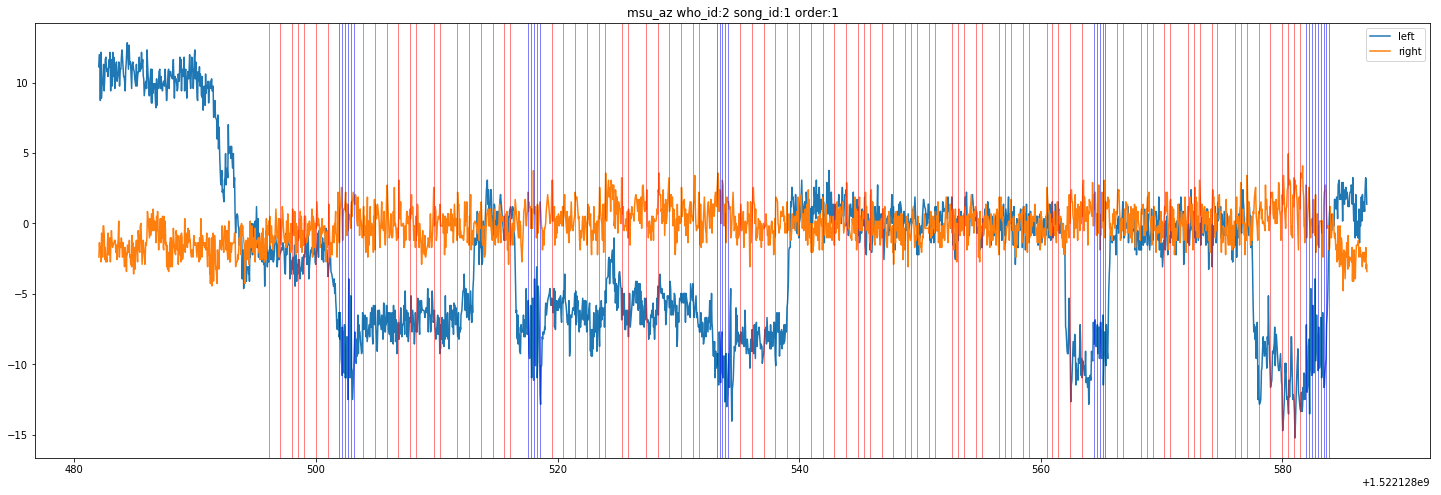

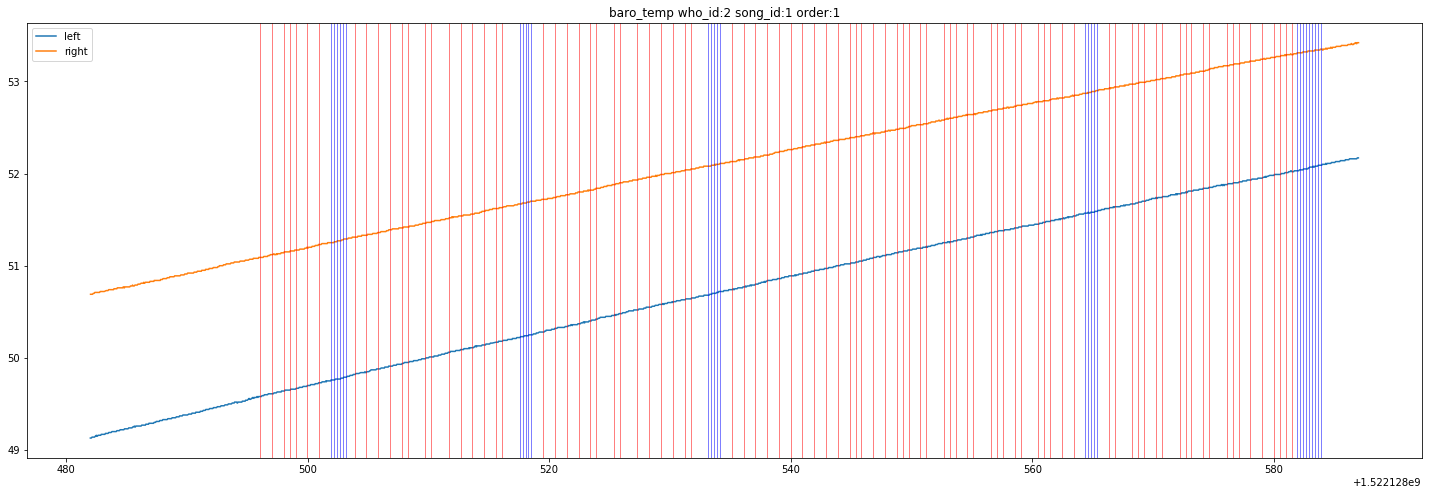

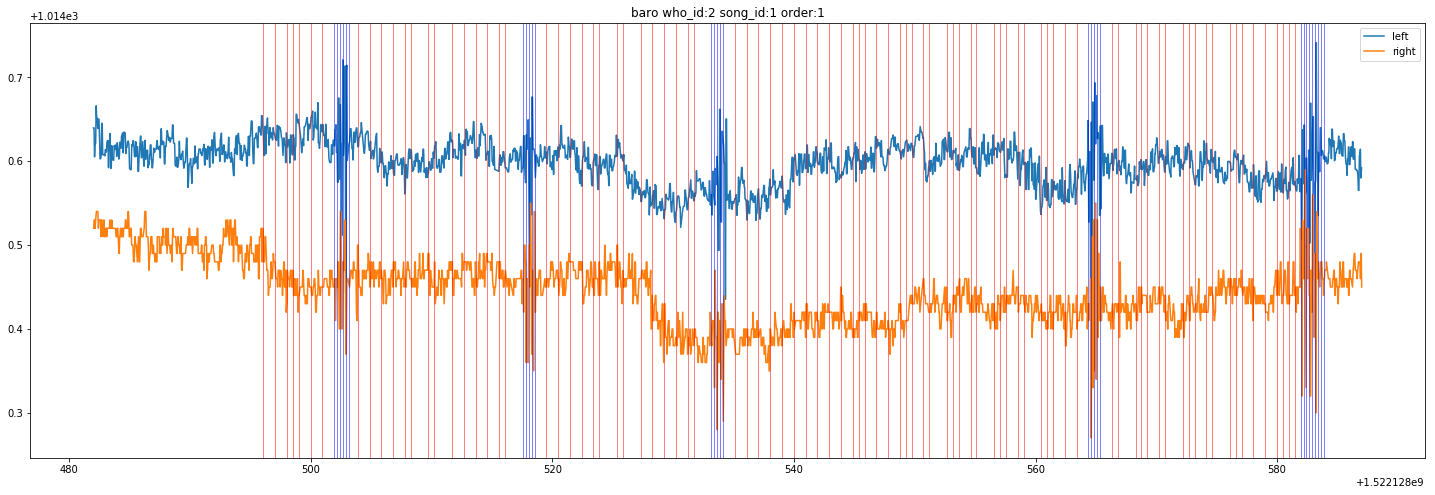

In [6]:
pfs[0].plot_global_event()

In [7]:
# for i in range(len(pfs)):
#     print(pfs[i].primitive_df)
pfs[2].primitive_df

,L_AAI,L_AVI,L_ASMA,L_GAI,L_GVI,L_GSMA,L_AAE,L_ARE,L_MAMI,L_MGMI,...,R_AMCR,R_GMCR,R_AXYCORR,R_AYZCORR,R_AZXCORR,R_GXYCORR,R_GYZCORR,R_GZXCORR,R_EVA1,R_EVA2
0,0.065645,0.000103,0.104125,5.526522,11.428301,8.849000,0.004412,41.970743,0.063824,4.256300,...,0.375000,0.291667,-0.009449,-0.537050,-0.227307,-0.597292,-0.744164,0.663761,1.006783,1.579829
1,0.131824,0.000475,0.214783,8.678313,10.645242,13.613087,0.017852,85.958360,0.130668,8.027777,...,0.307692,0.038462,0.085662,0.303697,0.222213,-0.443765,-0.791861,0.434649,0.918779,1.420085
2,0.155126,0.002608,0.255087,11.757441,13.953886,19.240957,0.026672,152.191306,0.142667,11.107028,...,0.045455,0.181818,0.714600,0.904537,0.820908,-0.820458,-0.584155,0.122681,0.295549,2.629153
3,0.124870,0.006364,0.204524,19.157977,66.070019,29.906571,0.021956,433.098115,0.139090,19.975001,...,0.045455,0.045455,0.942910,0.953774,0.949986,-0.902806,-0.332667,-0.061049,0.057476,2.897787
4,0.101121,0.004792,0.157545,22.238097,134.448394,34.853409,0.015018,628.981348,0.063531,22.964675,...,0.045455,0.272727,0.873876,0.981867,0.908587,-0.939346,-0.702908,0.524261,0.141628,2.843629
5,0.209780,0.003535,0.347333,15.634933,34.855273,23.163250,0.047542,279.306418,0.229418,15.150960,...,0.076923,0.115385,-0.467335,-0.337264,-0.403696,0.238358,0.518790,0.027142,1.328849,1.479014
6,0.044548,0.000218,0.068500,7.988392,20.591785,12.212944,0.002202,84.406185,0.045929,6.580077,...,0.058824,0.176471,-0.372225,0.435289,-0.839916,0.486188,-0.309451,0.575478,0.714010,2.128969
7,0.059324,0.000088,0.092304,4.520815,1.946411,6.620739,0.003608,22.384176,0.058292,4.303672,...,0.166667,0.125000,0.181857,0.042622,0.372462,-0.293307,-0.742867,0.320887,0.966527,1.432400
8,0.055581,0.000021,0.086571,3.307821,0.873166,5.121952,0.003110,11.814845,0.056089,3.495587,...,0.250000,0.250000,0.286862,0.560164,0.431407,0.237662,-0.544462,-0.539507,0.726846,1.861991
9,0.074231,0.000220,0.118409,5.703251,12.097215,8.460182,0.005731,44.624287,0.078294,4.625411,...,0.391304,0.304348,-0.140379,0.551862,0.162810,0.338205,-0.770337,0.107584,1.073027,1.552355


In [8]:
def cutstom_output_cnf_matrix(y, pred_y):
    cnf_matrix = confusion_matrix(y, pred_y)
    
    # Plot normalized confusion matrix
    plt.figure(figsize=(10, 10))
    plot_confusion_matrix(cnf_matrix, classes=[1, 2], normalize=True,
                          title='Normalized confusion matrix')
    plt.show()

[[-0.40612723 -0.33106627 -0.39342379 ...  0.29349588  0.49866152
  -0.69035991]
 [-0.08655605 -0.32477248 -0.0418911  ... -0.41038747  0.14839393
  -1.17476056]
 [ 0.02596747 -0.28870587  0.08614615 ... -1.36882582 -2.33216112
   2.49155105]
 ...
 [ 0.23975293 -0.25719059  0.28842014 ... -0.43748262  1.04532917
  -1.0455508 ]
 [ 0.3166621  -0.32738827  0.42448367 ... -1.02317059  0.17785209
  -0.98610546]
 [ 0.86305092 -0.22220154  0.90346768 ... -2.70572446  0.36902125
   0.09496313]]


100%|██████████| 361/361 [00:35<00:00, 10.16it/s]

let's go centroid=50, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 361/361 [00:35<00:00, 10.05it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.91208791 0.08791209]
 [0.26666667 0.73333333]]


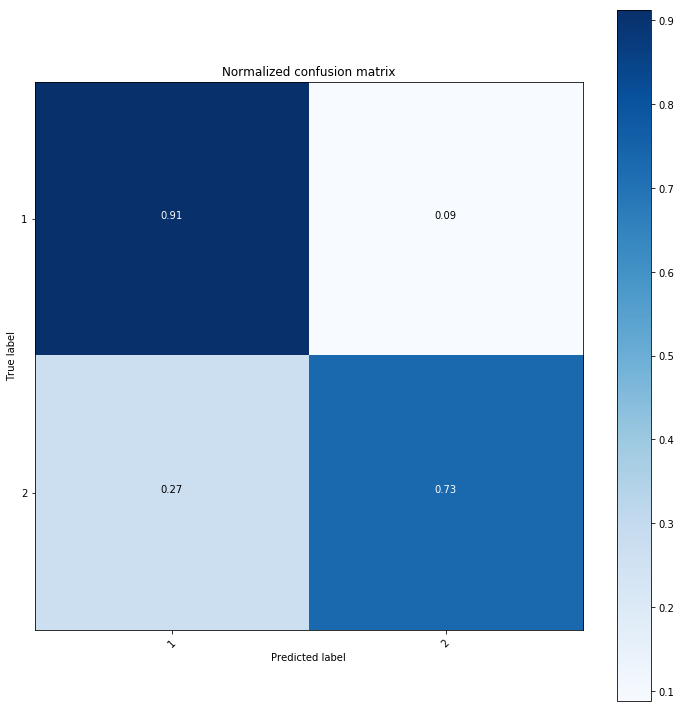

predicting 2 performance


100%|██████████| 361/361 [00:35<00:00, 10.22it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.93406593 0.06593407]
 [0.06666667 0.93333333]]


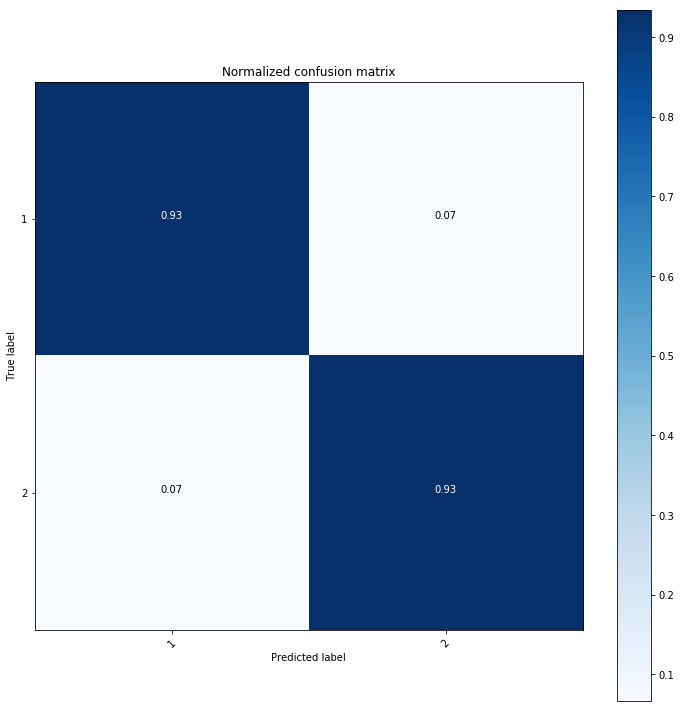

predicting 3 performance


100%|██████████| 361/361 [00:35<00:00, 10.16it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.98901099 0.01098901]
 [0.03333333 0.96666667]]


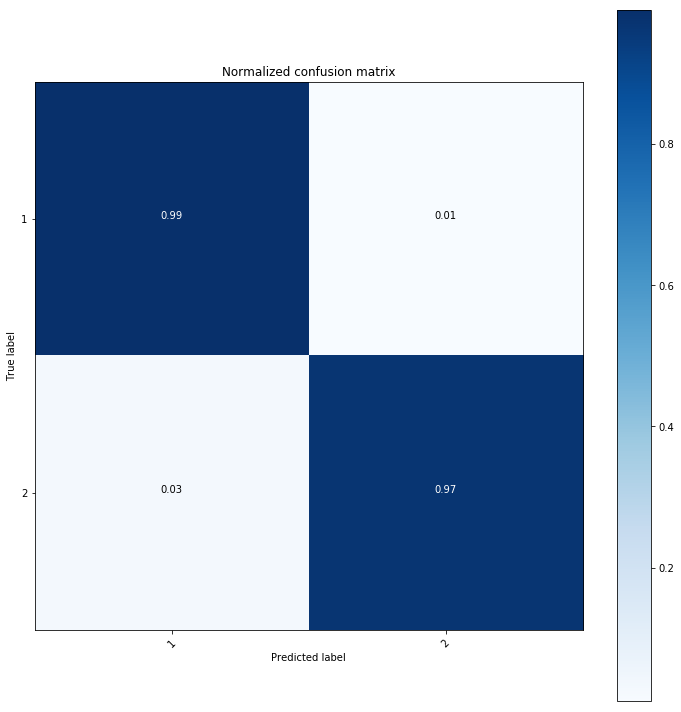

[[-0.40612723 -0.33106627 -0.39342379 ...  0.29349588  0.49866152
  -0.69035991]
 [-0.08655605 -0.32477248 -0.0418911  ... -0.41038747  0.14839393
  -1.17476056]
 [ 0.02596747 -0.28870587  0.08614615 ... -1.36882582 -2.33216112
   2.49155105]
 ...
 [ 0.23975293 -0.25719059  0.28842014 ... -0.43748262  1.04532917
  -1.0455508 ]
 [ 0.3166621  -0.32738827  0.42448367 ... -1.02317059  0.17785209
  -0.98610546]
 [ 0.86305092 -0.22220154  0.90346768 ... -2.70572446  0.36902125
   0.09496313]]


100%|██████████| 361/361 [00:35<00:00, 10.15it/s]

let's go centroid=50, C=500.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 361/361 [00:36<00:00, 10.01it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.86813187 0.13186813]
 [0.26666667 0.73333333]]


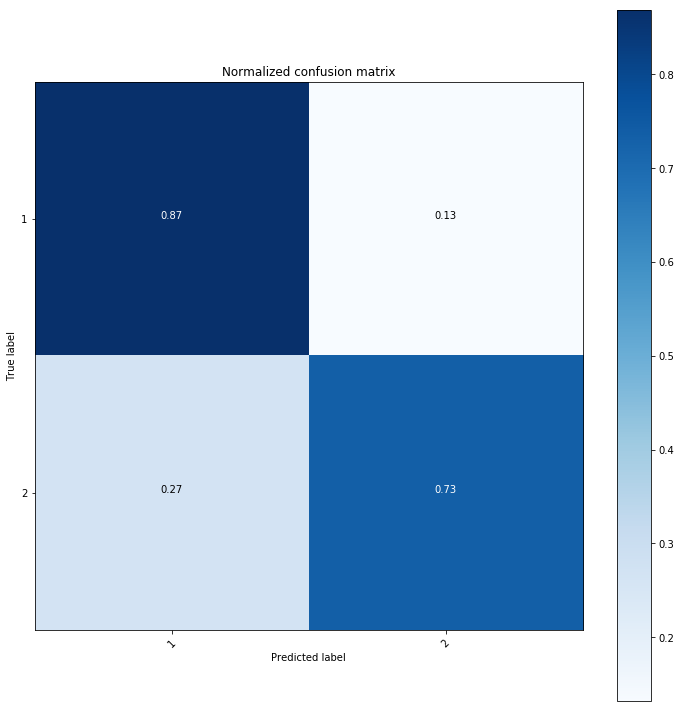

predicting 2 performance


100%|██████████| 361/361 [00:35<00:00, 10.22it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.92307692 0.07692308]
 [0.1        0.9       ]]


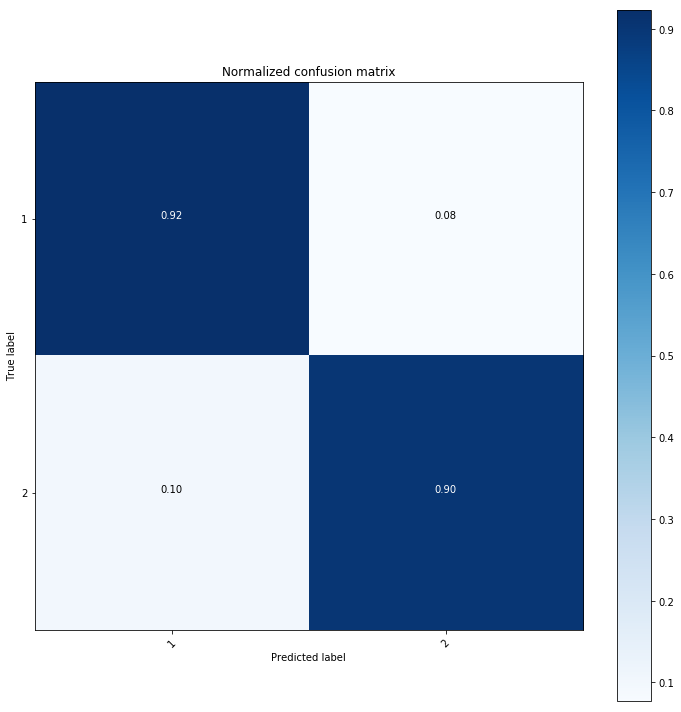

predicting 3 performance


100%|██████████| 361/361 [00:35<00:00, 10.13it/s]


============ prediction arm ============
Normalized confusion matrix
[[1.         0.        ]
 [0.03333333 0.96666667]]


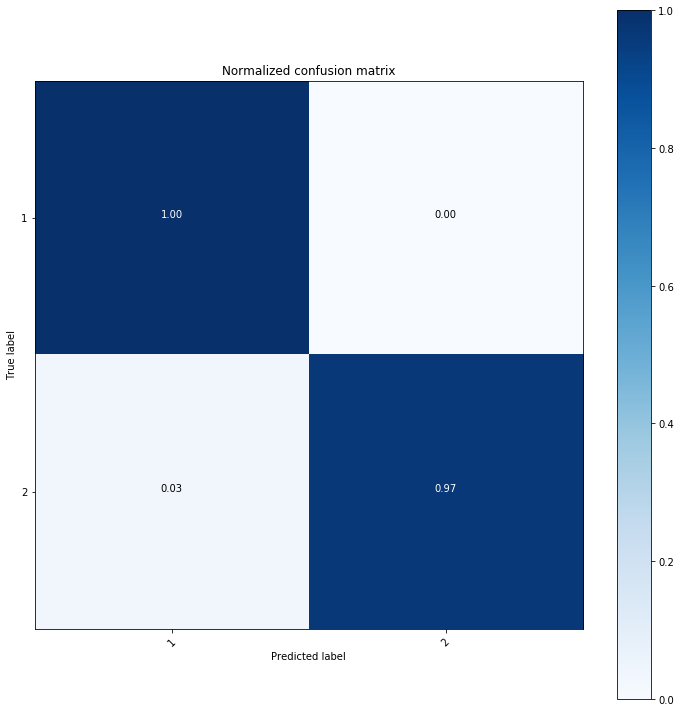

In [9]:
for k in [50]:
    for C in [100, 500]: 
        model = Model(k_centroid=k, tolerance=C)
        model.fit(pfs[TRAIN_ORDER - 1])
        print('let\'s go centroid=%d, C=%.2f @@@@@@@@@@@@@@@' % (k, C))
        for od in range(len(pfs)):
            print('predicting %d performance' % (od + 1))
            pred_y, y = model.predict(pfs[od])
            
            print('============ prediction arm ============')
            cutstom_output_cnf_matrix(y, pred_y)